<a href="https://colab.research.google.com/github/Mathias2204/Data_Science_MK/blob/main/CodingTask1_MK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline: Send your solution notebook per email to Sigve by 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

**Declaration:** The excercises were solved with the help of ChatGPT

CT-1.1:

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
input_file = '/content/drive/MyDrive/CCD-Data.txt' # To be adapted
output_file = '/content/drive/MyDrive/header_info.txt' # To be adapted
header_lines = []
with open(input_file, 'r') as f_in:
    for i in range(13):
        header_lines.append(f_in.readline())
with open(output_file, 'w') as f_out:
    f_out.writelines(header_lines)


df = pd.read_csv(input_file, delimiter='\t', skiprows=range(14))
df.to_csv('/content/drive/MyDrive/csv_file.csv', index=False)

CT-1.2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv_file.csv', delimiter=',')

int_df = df.rename(columns=lambda x: x.split('.')[0])
int_df = int_df.drop(int_df.columns[:2], axis=1)
red_df =  int_df.groupby(level=0, axis=1,).mean()
red_df.insert(0, 'timestamp', df['Unnamed: 1'])
red_df.head()

,timestamp,316,317,318,319,320,321,322,323,324,...,771,772,773,774,775,776,777,778,779,780
0,1540456324789,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,...,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679,-0.035545
1,1540456324878,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,...,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812,-0.038165
2,1540456324962,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,...,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057,-0.036903
3,1540456325046,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,...,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614,-0.036822
4,1540456325129,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,...,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132,-0.035900


CT-1.3

CT-1.4

In [ ]:
# Saving of the reduced dataframe using a pandas method (0.912 s):
red_df.to_csv('/content/drive/MyDrive/reduced_data_pandas.csv', index=False)



In [ ]:
# Saving of the reduced dataframe using an explicit loop (2.157 s):
import csv

with open('/content/drive/MyDrive/reduced_data_loop.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(red_df.columns)
    for row in red_df.values:
        writer.writerow(row)


CT-1.5

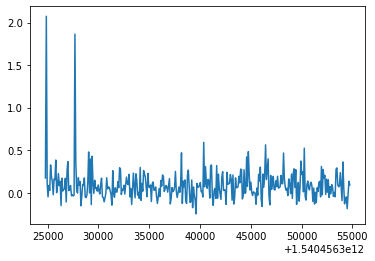

In [ ]:
import matplotlib.pyplot as plt

def wavelength_difference(df, nm1, nm2):
   difference = df[nm1] - df[nm2]
   plt.plot(df['timestamp'], difference)
   plt.show()


wavelength_difference(red_df, '319', '745')

CT-1.6

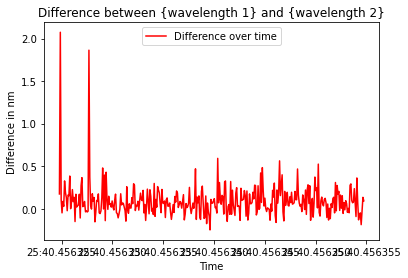

In [ ]:
def wavelength_difference(df, raw_df, nm1, nm2):
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  difference = df[nm1] - df[nm2]
  plt.plot(df['timestamp'], difference, color='red')
  plt.title("Difference between {wavelength 1} and {wavelength 2}")
  plt.xlabel("Time")
  plt.ylabel("Difference in nm")
  plt.savefig("difference_plot.png", dpi=400)
  plt.legend(['Difference over time'], loc='upper center')
  plt.show()


wavelength_difference(red_df, df, '319', '745')